In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [110]:
# Reading our train and test samples
data = pd.read_csv('Hotel Reservations.csv', header=0, sep=',', encoding = 'cp1251')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

No missing values

# Exploratory Data Analysis

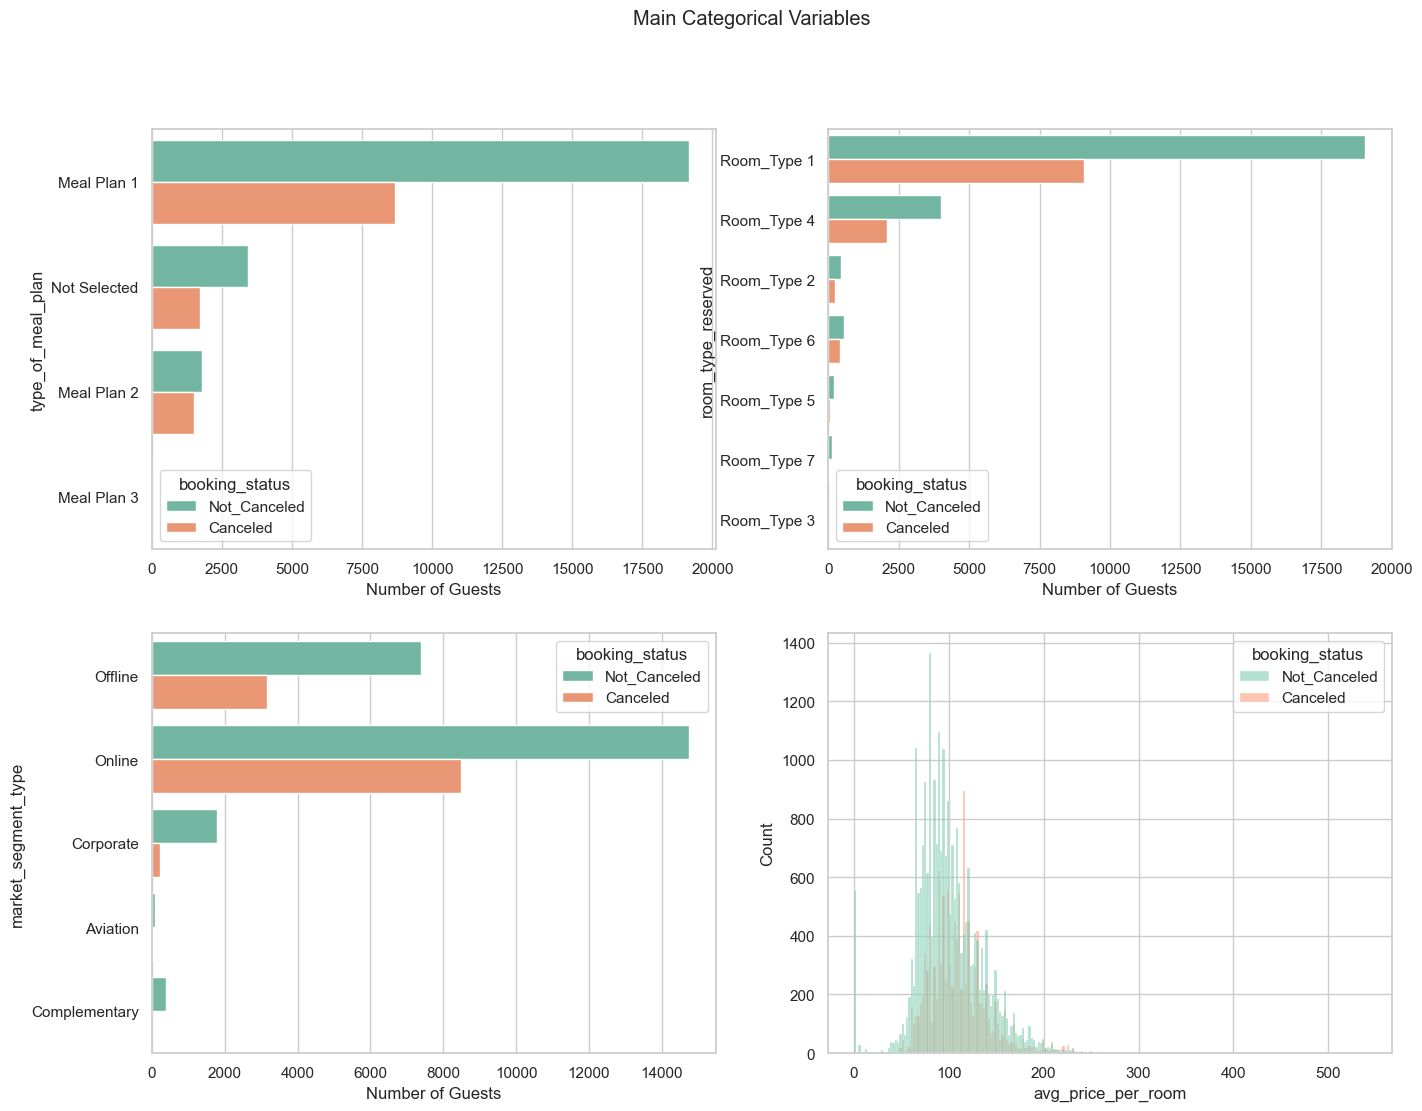

In [122]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Set2')

palette = sns.color_palette('Set2')

# mean_price_canceled = data[data['booking_status'] == "Canceled"]['avg_price_per_room'].mean()
# mean_price_not_canceled = data[data['booking_status'] == "Not_Canceled"]['avg_price_per_room'].mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))

fig.suptitle('Main Categorical Variables')

cat_dict = {'type_of_meal_plan':ax1,
             'room_type_reserved':ax2, 
             'market_segment_type':ax3}

for key, value in cat_dict.items():
    sns.countplot(data=data, y=key, hue='booking_status', ax=value)
    value.set_xlabel('Number of Guests')
    value.set_ylabel(f'{key}')

sns.histplot(data=data, x='avg_price_per_room', hue='booking_status', ax=ax4)

plt.show()

We can notice that:
1) Bookings with "Meal Plan 2" are more likely to be canceled
2) "Room Type 6" is more frequently being canceled than others
3) "Corporate", "Aviation" and "Complementary" bookings are less likely to be canceled comparing to "Online" and "Offline"
4) Average price per room is higher for canceled bookings than for realised ones

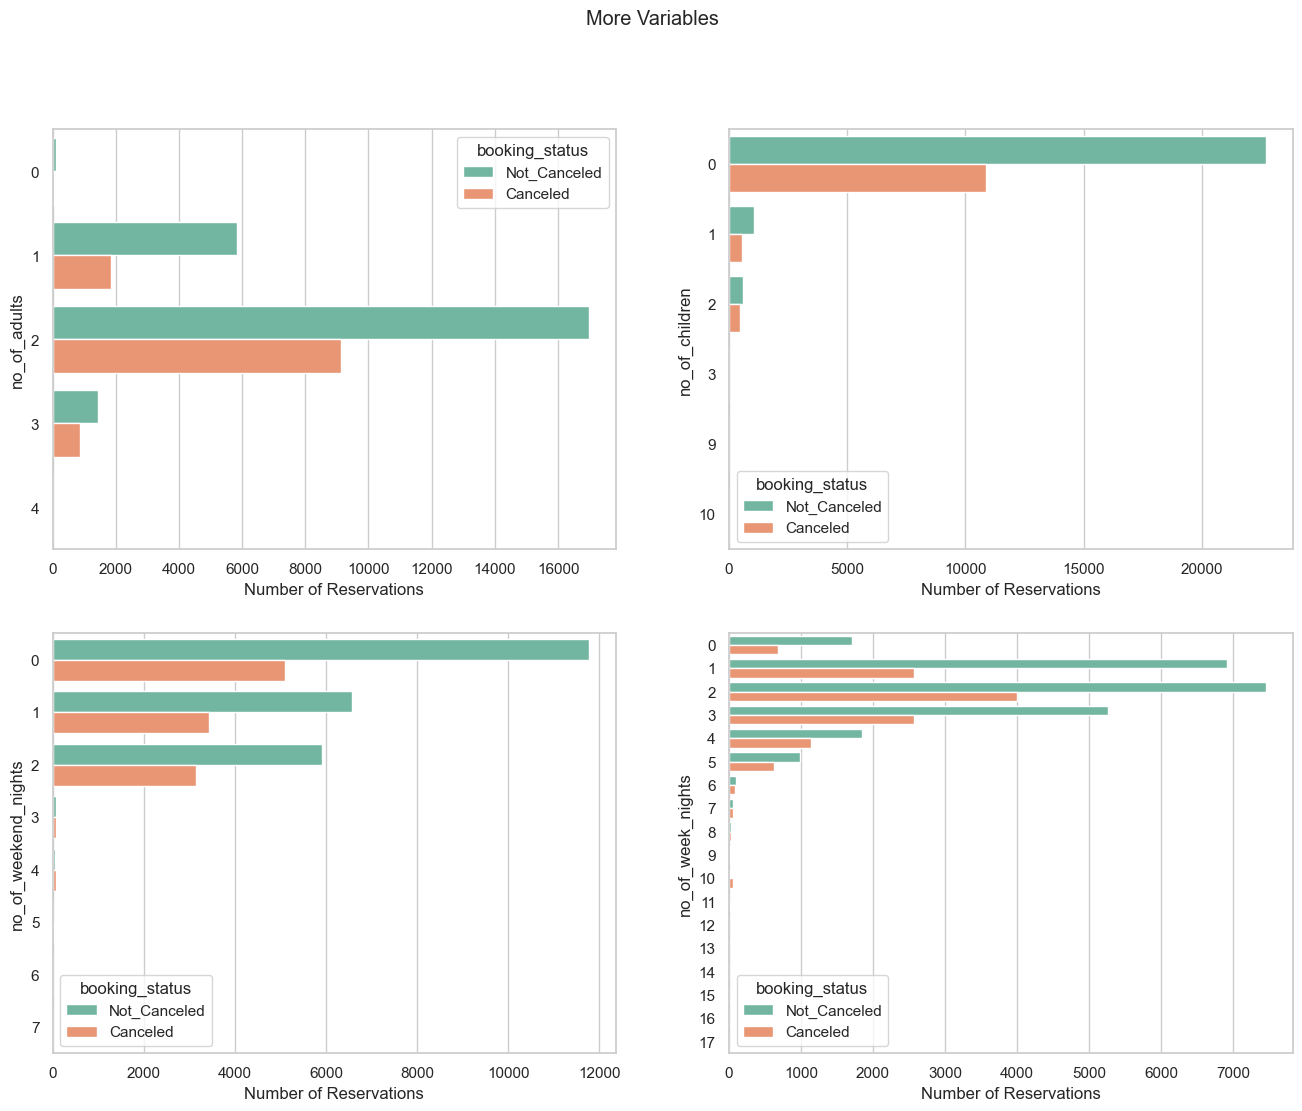

In [128]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))

fig.suptitle('More Variables')

nos_dict = {'no_of_adults':ax1,
            'no_of_children':ax2, 
            'no_of_weekend_nights':ax3,
            'no_of_week_nights':ax4}

for key, value in nos_dict.items():
    sns.countplot(data=data, y=key, hue='booking_status', ax=value)
    value.set_xlabel('Number of Reservations')
    value.set_ylabel(f'{key}')

plt.show()

Summary:
1) Having 2 children usually leads to booking cancelation
2) For 3 adults a proportion of cancelations is higher

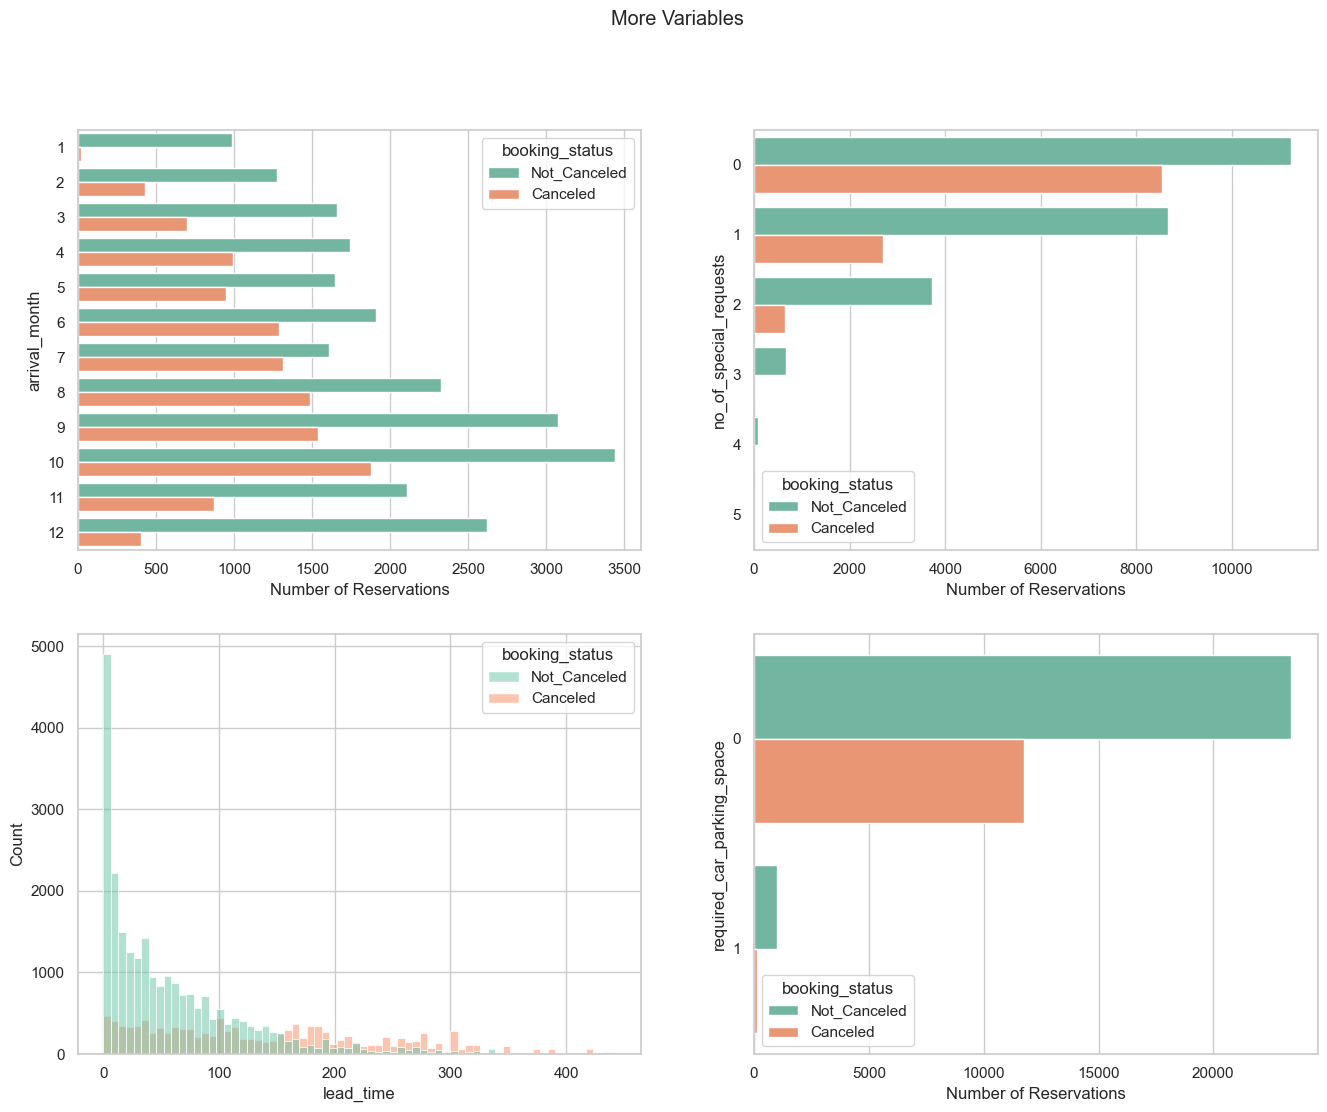

In [121]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))

fig.suptitle('More Variables')

nos_dict = {'arrival_month':ax1,
            'no_of_special_requests':ax2,
            'required_car_parking_space':ax4}

for key, value in nos_dict.items():
    sns.countplot(data=data, y=key, hue='booking_status', ax=value)
    value.set_xlabel('Number of Reservations')
    value.set_ylabel(f'{key}')
    
sns.histplot(data=data,x='lead_time', hue='booking_status', ax=ax3)

plt.show()

Summary:
1) Cancelation rate increases in summer and decreases in winter
2) larger number of special requests leads to smaller cancelation rate
3) the more in advanced booking was made -> more likely it will canceled
4) Required car parking space leads to smaller cancelation rate

# Data Preparation

<AxesSubplot: >

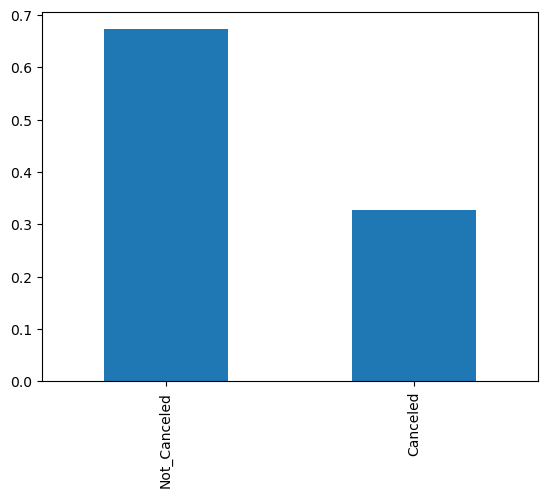

In [16]:
(data["booking_status"].value_counts()/data["booking_status"].shape).plot(kind='bar')

In [54]:
data["booking_status"] = data["booking_status"].map({"Not_Canceled": 0, "Canceled": 1})

The classes don't seem to be unbalanced, however we will try to make them more balanced to improve model performance

Now, we will deal with categorical features to transform them to numerical, they are:
- type_of_meal_plan
- room_type_reserved
- market_segment_type
- booking_status

In [55]:
data["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

We don't know the difference between meal plans, therefore, it is more natural to apply one-hot-encoding to them.
Rows with "Meal Plan 3" will be dropped

In [56]:
data_1 = data[data["type_of_meal_plan"] != "Meal Plan 3"]
data_1 = pd.get_dummies(data_1, columns=["type_of_meal_plan"])

In [57]:
data_1["room_type_reserved"].value_counts()

Room_Type 1    28129
Room_Type 4     6056
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      155
Room_Type 3        7
Name: room_type_reserved, dtype: int64

For this feature we will group room types 2,3,5,6,7 into column "other" as separately these groups are to small

In [67]:
data_2 = data_1.copy()
data_2["room_type_reserved"] = data_1["room_type_reserved"].map({"Room_Type 4":"4", "Room_Type 1": "1",
                                  "Room_Type 2":"other", "Room_Type 3":"other", 
                                  "Room_Type 5":"other", "Room_Type 6":"6", 
                                  "Room_Type 7":"other", })
data_2 = pd.get_dummies(data_2, columns=["room_type_reserved"])

In [59]:
data_2["market_segment_type"].value_counts()

Online           23214
Offline          10527
Corporate         2017
Complementary      387
Aviation           125
Name: market_segment_type, dtype: int64

It seems that each type is important and it is better to distinguish them. However, we will visualise the realtionship between "market_segment_type" and target variable

/var/folders/k8/xpv6clpj0b53hrb3hp3gjqtm0000gn/T/ipykernel_91792/2930899674.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_2.groupby(by="market_segment_type").mean()["booking_status"].plot(kind='bar')


<AxesSubplot: xlabel='market_segment_type'>

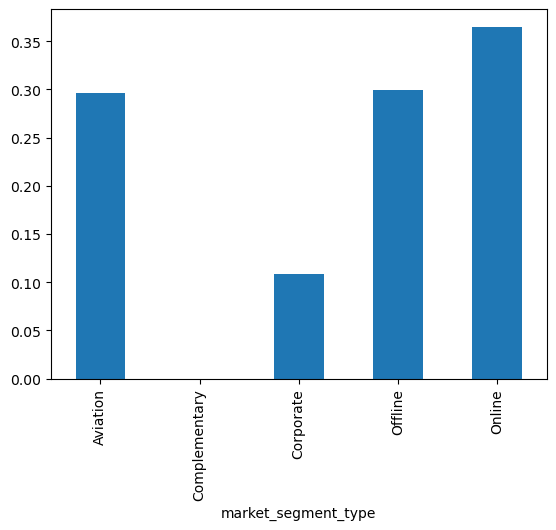

In [68]:
data_2.groupby(by="market_segment_type").mean()["booking_status"].plot(kind='bar')


We will drop "Aviation" and group "Complementary" and "Corporate" together

In [69]:
data_3 = data_2[data_2["market_segment_type"] != "Aviation"]
data_3["market_segment_type"] = data_3["market_segment_type"].map({"Corporate":"other", "Complementary": "other",
                                  "Offline":"Offline", "Online": "Online"}) 
data_3 = pd.get_dummies(data_3, columns=["market_segment_type"])

/var/folders/k8/xpv6clpj0b53hrb3hp3gjqtm0000gn/T/ipykernel_91792/3786896457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3["market_segment_type"] = data_3["market_segment_type"].map({"Corporate":"other", "Complementary": "other",


In [76]:
data_3.drop("Booking_ID", axis=1, inplace=True)

Scaling will be done after splitting

# Feature selection and engineering

The first thing to do - feature engineering. I would like to add:
1) total_number_of_nights
2) total_price
3) price_per_guest
4) arrival_month -> season(winter,spring,summer,autumn)
5) arrival_date -> weekend or not
6) cancelation_rate

In [89]:
data_4 = data_3.copy()
data_4["total_no_of_nights"] = data_4["no_of_weekend_nights"] + data_4["no_of_week_nights"]
data_4["total_price"] = data_4["total_no_of_nights"] * data_4["avg_price_per_room"]
data_4["avg_price_per_guest"] = data_4["total_price"] / (data_4["no_of_adults"] + data_4["no_of_children"])
data_4["cancelation_rate"] = data_4["no_of_previous_cancellations"] / (data_4["no_of_previous_cancellations"] + data_4["no_of_previous_bookings_not_canceled"])
data_4["cancelation_rate"].fillna(0, inplace=True)

def g(x):
    if x in [12,1,2]:
        return "winter"
    if x in [3,4,5]:
        return "spring"
    if x in [6,7,8]:
        return "summer"
    return "autumn"
data_4["season"] = data_4["arrival_month"].apply(lambda x: g(x))
data_4 = pd.get_dummies(data_4, columns=["season"])



In [150]:
data_4_corr = data_4.corr()['booking_status'][:-1] # -1 means that the latest row is SalePrice
top_features = data_4_corr[abs(data_4_corr) > 0.05].sort_values(ascending=False)[1:] #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 18 strongly correlated values with SalePrice:
lead_time                               0.439644
arrival_year                            0.180145
total_price                             0.154767
avg_price_per_room                      0.142456
avg_price_per_guest                     0.120700
season_summer                           0.110700
market_segment_type_Online              0.106522
total_no_of_nights                      0.101421
no_of_week_nights                       0.091244
no_of_adults                            0.087168
type_of_meal_plan_Meal Plan 2           0.086447
no_of_weekend_nights                    0.059507
no_of_previous_bookings_not_canceled   -0.060015
type_of_meal_plan_Meal Plan 1          -0.061357
required_car_parking_space             -0.085865
repeated_guest                         -0.106395
market_segment_type_other              -0.134344
no_of_special_requests                 -0.253919
Name: booking_status, dtype: float64


In [151]:
x = data_4[top_features.index.to_list()]
y = data_4["booking_status"]

# Models preparation and evaluation

In [258]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_4, test_size=0.3, random_state=42)
x_train, y_train = train[top_features.index.to_list()], train["booking_status"]
x_test, y_test = test[top_features.index.to_list()], test["booking_status"]

sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)


In [234]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos
    
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    values = []
    for index in range(df.shape[0]):
        values.append(df.iloc[index,1:].values)
#     original = df.iloc[0, 1:].values
#     class_weight = df.iloc[1, 1:].values
#     smote = df.iloc[2, 1:].values
#     under = df.iloc[3, 1:].values
    width = 0.2
#     figure(figsize=(12, 10), dpi=80)
    for i in range(len(values)):
        plt.bar(x+0.2*i, values[i], width)
#     plt.bar(x-0.2, original, width, color='#95a5a6')
#     plt.bar(x, class_weight, width, color='#d35400')
#     plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Log Reg", "XGBoost", "Random Forest"])
    plt.show()
    

Following models will be applied:
1) Random forest
2) Logistic Regression
3) XGBoost

I will use grid-search to find  best hyperparameters and in the end stack best estimators using majority vote

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [185]:
# Create the random grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)],
               'max_features': ['sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 100, num = 3)],
               'min_samples_split': [2, 6],
               'min_samples_leaf': [6, 9],
               'bootstrap': [True]}

RFR = RandomForestClassifier()
best_rfr=GridSearchCV(RFR,param_grid=param_grid,scoring='precision',cv=3,verbose=2)
best_rfr.fit(X_train_std,y_train)
print(best_rfr.best_params_, best_rfr.best_score_)



Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=700; total

[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=400; total time=   4.3s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=400; total time=   4.4s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=400; total time=   4.3s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=700; total time=   7.6s
[CV] END bootstrap=True, max_depth=55, max_featu

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   4.1s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   4.2s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   7.2s
[CV] END bootstrap=True, max_depth=100, m

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [187]:
param_grid = {'learning_rate': [0.1*(n+1) for n in range(2)],
             'n_estimators' : [2*n+1 for n in range(2)] }

xgboost = XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')
best_xgb = GridSearchCV(xgboost,param_grid=param_grid,scoring='precision',cv=3,verbose=3)
best_xgb.fit(X_train_std,y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .learning_rate=0.1, n_estimators=1;, score=0.828 total time=   0.0s
[CV 2/3] END .learning_rate=0.1, n_estimators=1;, score=0.790 total time=   0.0s
[CV 3/3] END .learning_rate=0.1, n_estimators=1;, score=0.792 total time=   0.0s
[CV 1/3] END .learning_rate=0.1, n_estimators=3;, score=0.800 total time=   0.0s
[CV 2/3] END .learning_rate=0.1, n_estimators=3;, score=0.782 total time=   0.0s
[CV 3/3] END .learning_rate=0.1, n_estimators=3;, score=0.806 total time=   0.0s


/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/savindmitriy/miniforge3/lib/python3.10/site-package

[CV 1/3] END .learning_rate=0.2, n_estimators=1;, score=0.828 total time=   0.0s
[CV 2/3] END .learning_rate=0.2, n_estimators=1;, score=0.790 total time=   0.0s
[CV 3/3] END .learning_rate=0.2, n_estimators=1;, score=0.792 total time=   0.0s
[CV 1/3] END .learning_rate=0.2, n_estimators=3;, score=0.813 total time=   0.0s
[CV 2/3] END .learning_rate=0.2, n_estimators=3;, score=0.808 total time=   0.0s
[CV 3/3] END .learning_rate=0.2, n_estimators=3;, score=0.802 total time=   0.0s


/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/savindmitriy/miniforge3/lib/python3.10/site-package

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.1, 0.2], 'n_estimators': [1, 3]},
             scoring='precision', verbose=3)

In [188]:
param_grid = { "C": np.logspace(-4, 4, 50),
                "penalty": ['l1', 'l2']
             }
log_reg = LogisticRegression(solver='liblinear')
best_lr = GridSearchCV(log_reg,param_grid=param_grid,scoring='precision',cv=3,verbose=3)
best_lr.fit(X_train_std,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END ..............C=0.0001, penalty=l1;, score=0.000 total time=   0.0s
[CV 2/3] END ..............C=0.0001, penalty=l1;, score=0.000 total time=   0.0s
[CV 3/3] END ..............C=0.0001, penalty=l1;, score=0.000 total time=   0.0s
[CV 1/3] END ..............C=0.0001, penalty=l2;, score=0.689 total time=   0.0s
[CV 2/3] END ..............C=0.0001, penalty=l2;, score=0.701 total time=   0.0s
[CV 3/3] END ..............C=0.0001, penalty=l2;, score=0.690 total time=   0.0s
[CV 1/3] END C=0.00014563484775012445, penalty=l1;, score=0.000 total time=   0.0s
[CV 2/3] END C=0.00014563484775012445, penalty=l1;, score=0.000 total time=   0.0s
[CV 3/3] END C=0.00014563484775012445, penalty=l1;, score=0.000 total time=   0.0s
[CV 1/3] END C=0.00014563484775012445, penalty=l2;, score=0.706 total time=   0.0s
[CV 2/3] END C=0.00014563484775012445, penalty=l2;, score=0.714 total time=   0.0s
[CV 3/3] END C=0.0001456348477501244

/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/sklearn

[CV 2/3] END C=0.00021209508879201905, penalty=l2;, score=0.725 total time=   0.0s
[CV 3/3] END C=0.00021209508879201905, penalty=l2;, score=0.716 total time=   0.0s
[CV 1/3] END C=0.00030888435964774815, penalty=l1;, score=0.556 total time=   0.0s
[CV 2/3] END C=0.00030888435964774815, penalty=l1;, score=0.552 total time=   0.0s
[CV 3/3] END C=0.00030888435964774815, penalty=l1;, score=0.552 total time=   0.0s
[CV 1/3] END C=0.00030888435964774815, penalty=l2;, score=0.725 total time=   0.0s
[CV 2/3] END C=0.00030888435964774815, penalty=l2;, score=0.733 total time=   0.0s
[CV 3/3] END C=0.00030888435964774815, penalty=l2;, score=0.726 total time=   0.0s
[CV 1/3] END C=0.0004498432668969444, penalty=l1;, score=0.651 total time=   0.0s
[CV 2/3] END C=0.0004498432668969444, penalty=l1;, score=0.654 total time=   0.0s
[CV 3/3] END C=0.0004498432668969444, penalty=l1;, score=0.648 total time=   0.0s
[CV 1/3] END C=0.0004498432668969444, penalty=l2;, score=0.732 total time=   0.0s
[CV 2/3]

[CV 3/3] END .C=0.12648552168552957, penalty=l2;, score=0.741 total time=   0.0s
[CV 1/3] END .C=0.18420699693267145, penalty=l1;, score=0.741 total time=   0.1s
[CV 2/3] END .C=0.18420699693267145, penalty=l1;, score=0.752 total time=   0.0s
[CV 3/3] END .C=0.18420699693267145, penalty=l1;, score=0.741 total time=   0.1s
[CV 1/3] END .C=0.18420699693267145, penalty=l2;, score=0.741 total time=   0.0s
[CV 2/3] END .C=0.18420699693267145, penalty=l2;, score=0.752 total time=   0.0s
[CV 3/3] END .C=0.18420699693267145, penalty=l2;, score=0.740 total time=   0.0s
[CV 1/3] END ..C=0.2682695795279725, penalty=l1;, score=0.741 total time=   0.0s
[CV 2/3] END ..C=0.2682695795279725, penalty=l1;, score=0.753 total time=   0.1s
[CV 3/3] END ..C=0.2682695795279725, penalty=l1;, score=0.741 total time=   0.1s
[CV 1/3] END ..C=0.2682695795279725, penalty=l2;, score=0.741 total time=   0.0s
[CV 2/3] END ..C=0.2682695795279725, penalty=l2;, score=0.752 total time=   0.0s
[CV 3/3] END ..C=0.268269579

[CV 1/3] END ..C=109.85411419875572, penalty=l1;, score=0.740 total time=   0.1s
[CV 2/3] END ..C=109.85411419875572, penalty=l1;, score=0.752 total time=   0.1s
[CV 3/3] END ..C=109.85411419875572, penalty=l1;, score=0.740 total time=   0.1s
[CV 1/3] END ..C=109.85411419875572, penalty=l2;, score=0.740 total time=   0.0s
[CV 2/3] END ..C=109.85411419875572, penalty=l2;, score=0.752 total time=   0.0s
[CV 3/3] END ..C=109.85411419875572, penalty=l2;, score=0.740 total time=   0.0s
[CV 1/3] END ..C=159.98587196060572, penalty=l1;, score=0.740 total time=   0.1s
[CV 2/3] END ..C=159.98587196060572, penalty=l1;, score=0.752 total time=   0.1s
[CV 3/3] END ..C=159.98587196060572, penalty=l1;, score=0.740 total time=   0.0s
[CV 1/3] END ..C=159.98587196060572, penalty=l2;, score=0.740 total time=   0.0s
[CV 2/3] END ..C=159.98587196060572, penalty=l2;, score=0.752 total time=   0.0s
[CV 3/3] END ..C=159.98587196060572, penalty=l2;, score=0.740 total time=   0.0s
[CV 1/3] END ..C=232.9951810

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.963...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [259]:
models = [best_lr.best_estimator_, best_xgb.best_estimator_, best_rfr.best_estimator_]
results = []
for model in models:
    y_pred = model.predict(X_test_std)
    result = evaluate(y_test, y_pred)
    results.append(result)

       type  accuracy    recall       auc  precision    fscore
0  Original  0.798506  0.584379  0.742639   0.738207  0.589100
1  Original  0.849871  0.715222  0.814740   0.799554  0.718136
2  Original  0.881132  0.759692  0.849448   0.856638  0.763013


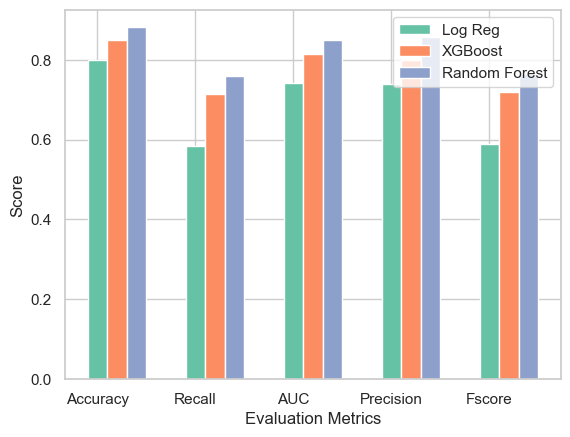

In [260]:
visualize_eval_metrics(results)

It is obvious that Random forest perfoms better than other models. Now I will try to stack all three using majority vote

/Users/savindmitriy/miniforge3/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


       type  accuracy    recall       auc  precision    fscore
0  Original  0.798506  0.584379  0.742639   0.738207  0.589100
1  Original  0.849871  0.715222  0.814740   0.799554  0.718136
2  Original  0.881132  0.759692  0.849448   0.856638  0.763013
3  Original  0.856142  0.701824  0.815879   0.827285  0.705942


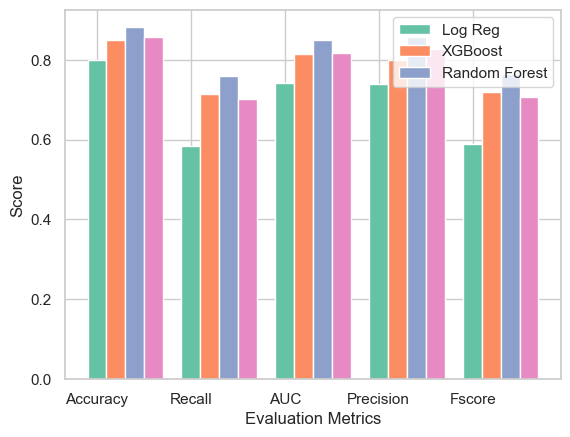

In [261]:
from sklearn.ensemble import VotingClassifier
voter = VotingClassifier(estimators=[('rfr', best_rfr.best_estimator_), ('lr', best_lr.best_estimator_), ('xgb', best_xgb.best_estimator_)], voting='hard')
voter.fit(X_train_std,y_train)

y_pred = voter.predict(X_test_std)
result = evaluate(y_test,y_pred)
results.append(result)
visualize_eval_metrics(results)

In [252]:
df = pd.DataFrame()
for feature, importance in zip(x_train.columns.to_list(),best_rfr.best_estimator_.feature_importances_):
    print(feature, importance)

lead_time 0.35801317494197243
arrival_year 0.03380271624568934
total_price 0.08465762863555434
avg_price_per_room 0.12230987914370757
avg_price_per_guest 0.07228097355585776
season_summer 0.014572143119415053
market_segment_type_Online 0.06298156209981463
total_no_of_nights 0.0223653651854613
no_of_week_nights 0.01967763673292594
no_of_adults 0.015207800066678755
type_of_meal_plan_Meal Plan 2 0.009355461389149302
no_of_weekend_nights 0.01857686779059635
no_of_previous_bookings_not_canceled 0.0008680384050956612
type_of_meal_plan_Meal Plan 1 0.009915414782703844
required_car_parking_space 0.0064750664782920716
repeated_guest 0.0012342464542742031
market_segment_type_other 0.007076497501863452
no_of_special_requests 0.140629527470948
